Mean of omega1:  [3.25 6.  ]
Mean of omega2:  [ 3. -2.]
Covariance of omega1:  [[1.58333333 0.        ]
 [0.         2.66666667]]
Covariance of omega2:  [[2.66666667 0.        ]
 [0.         2.66666667]]


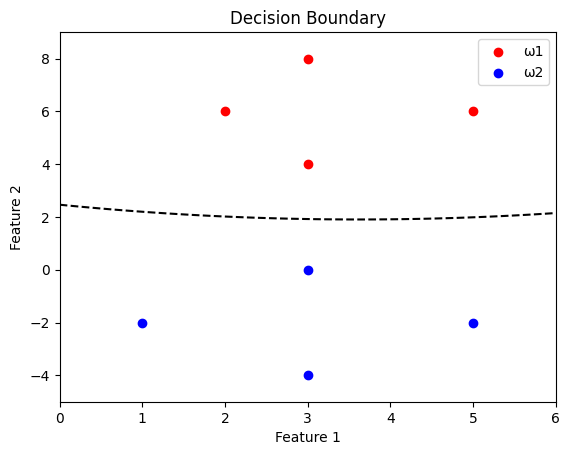

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points
omega1 = np.array([[2, 6], [3, 4], [3, 8], [5, 6]])
omega2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])

# Step 1: Compute mean vectors and covariance matrices
mean_omega1 = np.mean(omega1, axis=0)
mean_omega2 = np.mean(omega2, axis=0)
print('Mean of omega1: ', mean_omega1)
print('Mean of omega2: ', mean_omega2)

cov_omega1 = np.cov(omega1, rowvar=False, bias=False)
cov_omega2 = np.cov(omega2, rowvar=False, bias=False)
print('Covariance of omega1: ', cov_omega1)
print('Covariance of omega2: ', cov_omega2)

# Step 2: Calculate decision boundary parameters
inv_cov_omega1 = np.linalg.inv(cov_omega1)
inv_cov_omega2 = np.linalg.inv(cov_omega2)

# Coefficients for quadratic decision boundary: ax^2 + by^2 + cxy + dx + ey + f = 0
a = -0.5 * (inv_cov_omega1[0, 0] - inv_cov_omega2[0, 0])
b = -0.5 * (inv_cov_omega1[1, 1] - inv_cov_omega2[1, 1])
c = -0.5* ((inv_cov_omega1[0, 1] + inv_cov_omega1[1 , 0])- inv_cov_omega2[0, 1] - inv_cov_omega2[1, 0])
d = (mean_omega1[0] * inv_cov_omega1[0, 0] + mean_omega1[1]*inv_cov_omega1[0,1]) - (mean_omega2[0] * inv_cov_omega2[0, 0] - mean_omega2[1] * inv_cov_omega2[1, 0])
e = (mean_omega1[1] * inv_cov_omega1[1, 1] +mean_omega1[0]*inv_cov_omega1[1,0]) - (mean_omega2[1] * inv_cov_omega2[1, 1] - mean_omega2[0] * inv_cov_omega2[0, 1])
f = 0.5 * (np.dot(mean_omega2, np.dot(inv_cov_omega2, mean_omega2)) - np.dot(mean_omega1, np.dot(inv_cov_omega1, mean_omega1))) - 0.5 * np.log(np.linalg.det(cov_omega1) / np.linalg.det(cov_omega2))

# Step 3: Generate mesh grid
x_min, x_max = min(omega1[:, 0].min(), omega2[:, 0].min()) - 1, max(omega1[:, 0].max(), omega2[:, 0].max()) + 1
y_min, y_max = min(omega1[:, 1].min(), omega2[:, 1].min()) - 1, max(omega1[:, 1].max(), omega2[:, 1].max()) + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Step 4: Plot data points and decision boundary
plt.scatter(omega1[:, 0], omega1[:, 1], color='red', label='ω1')
plt.scatter(omega2[:, 0], omega2[:, 1], color='blue', label='ω2')

# Compute decision boundary
zz = a*xx**2 + b*yy**2 + c*xx*yy + d*xx + e*yy + f

plt.contour(xx, yy, zz, levels=[0], colors='black', linestyles='dashed')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary')
plt.show()


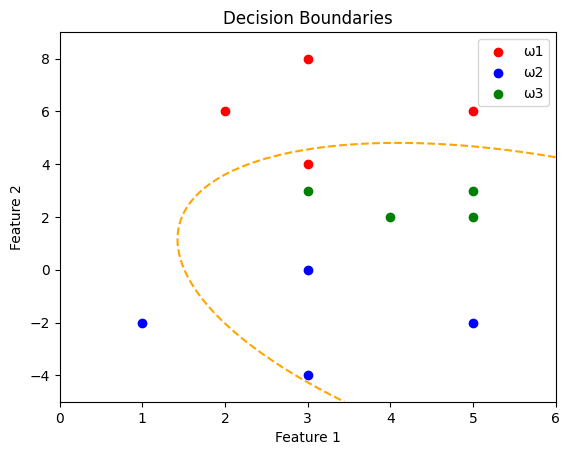

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points
omega1 = np.array([[2, 6], [3, 4], [3, 8], [5, 6]])
omega2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])
omega3 = np.array([[3, 3], [4, 2], [5, 2], [5, 3]])


# Step 1: Compute mean vectors and covariance matrices for all classes
mean_omega1 = np.mean(omega1, axis=0)
mean_omega2 = np.mean(omega2, axis=0)
mean_omega3 = np.mean(omega3, axis=0)

cov_omega1 = np.cov(omega1, rowvar=False, bias=False)
cov_omega2 = np.cov(omega2, rowvar=False, bias=False)
cov_omega3 = np.cov(omega3, rowvar=False, bias=False)

# Step 2: Calculate decision boundary parameters
inv_cov_omega1 = np.linalg.inv(cov_omega1)
inv_cov_omega2 = np.linalg.inv(cov_omega2)
inv_cov_omega3 = np.linalg.inv(cov_omega3)

# Coefficients for quadratic decision boundary: ax^2 + by^2 + cxy + dx + ey + f = 0
a = -0.5 * (inv_cov_omega1[0, 0] - inv_cov_omega2[0, 0])
b = -0.5 * (inv_cov_omega1[1, 1] - inv_cov_omega2[1, 1])
c = -0.5* ((inv_cov_omega1[0, 1] + inv_cov_omega1[1 , 0])- inv_cov_omega2[0, 1] - inv_cov_omega2[1, 0])
d = (mean_omega1[0] * inv_cov_omega1[0, 0] + mean_omega1[1]*inv_cov_omega1[0,1]) - (mean_omega2[0] * inv_cov_omega2[0, 0] - mean_omega2[1] * inv_cov_omega2[1, 0])
e = (mean_omega1[1] * inv_cov_omega1[1, 1] +mean_omega1[0]*inv_cov_omega1[1,0]) - (mean_omega2[1] * inv_cov_omega2[1, 1] - mean_omega2[0] * inv_cov_omega2[0, 1])
f = 0.5 * (np.dot(mean_omega2, np.dot(inv_cov_omega2, mean_omega2)) - np.dot(mean_omega1, np.dot(inv_cov_omega1, mean_omega1))) - 0.5 * np.log(np.linalg.det(cov_omega1) / np.linalg.det(cov_omega2))

a_omega3 = -0.5 * (inv_cov_omega3[0, 0] - inv_cov_omega1[0, 0])
b_omega3 = -0.5 * (inv_cov_omega3[1, 1] - inv_cov_omega1[1, 1])
c_omega3 = -0.5 * ((inv_cov_omega3[0, 1] + inv_cov_omega3[1, 0]) - (inv_cov_omega1[0, 1] + inv_cov_omega1[1, 0]))
d_omega3 = (mean_omega3[0] * inv_cov_omega3[0, 0] + mean_omega3[1] * inv_cov_omega3[0, 1]) - (mean_omega1[0] * inv_cov_omega1[0, 0] - mean_omega1[1] * inv_cov_omega1[1, 0])
e_omega3 = (mean_omega3[1] * inv_cov_omega3[1, 1] + mean_omega3[0] * inv_cov_omega3[1, 0]) - (mean_omega1[1] * inv_cov_omega1[1, 1] - mean_omega1[0] * inv_cov_omega1[1, 0])
f_omega3 = 0.5 * (np.dot(mean_omega1, np.dot(inv_cov_omega1, mean_omega1)) - np.dot(mean_omega3, np.dot(inv_cov_omega3, mean_omega3))) - 0.5 * np.log(np.linalg.det(cov_omega1) / np.linalg.det(cov_omega3))

# ... (previous code remains the same)

a_omega2 = -0.5 * (inv_cov_omega2[0, 0] - inv_cov_omega3[0, 0])
b_omega2 = -0.5 * (inv_cov_omega2[1, 1] - inv_cov_omega3[1, 1])
c_omega2= -0.5 * ((inv_cov_omega2[0, 1] + inv_cov_omega2[1, 0]) - (inv_cov_omega3[0, 1] + inv_cov_omega3[1, 0]))
d_omega2 = (mean_omega2[0] * inv_cov_omega2[0, 0] + mean_omega2[1] * inv_cov_omega2[0, 1]) - (mean_omega3[0] * inv_cov_omega3[0, 0] - mean_omega3[1] * inv_cov_omega3[1, 0])
e_omega2= (mean_omega2[1] * inv_cov_omega2[1, 1] + mean_omega2[0] * inv_cov_omega2[1, 0]) - (mean_omega3[1] * inv_cov_omega3[1, 1] - mean_omega3[0] * inv_cov_omega3[0, 1])
f_omega2 = 0.5 * (np.dot(mean_omega3, np.dot(inv_cov_omega3, mean_omega3)) - np.dot(mean_omega2, np.dot(inv_cov_omega2, mean_omega2))) - 0.5 * np.log(np.linalg.det(cov_omega2) / np.linalg.det(cov_omega3))

# ... (rest of the code remains the same)


# Generate mesh grid for each class
x_min1, x_max1 = omega1[:, 0].min() - 1, omega1[:, 0].max() + 1
y_min1, y_max1 = omega1[:, 1].min() - 1, omega1[:, 1].max() + 1
xx1, yy1 = np.meshgrid(np.linspace(x_min1, x_max1, 100), np.linspace(y_min1, y_max1, 100))

x_min2, x_max2 = omega2[:, 0].min() - 1, omega2[:, 0].max() + 1
y_min2, y_max2 = omega2[:, 1].min() - 1, omega2[:, 1].max() + 1
xx2, yy2 = np.meshgrid(np.linspace(x_min2, x_max2, 100), np.linspace(y_min2, y_max2, 100))

x_min3, x_max3 = omega3[:, 0].min() - 1, omega3[:, 0].max() + 1
y_min3, y_max3 = omega3[:, 1].min() - 1, omega3[:, 1].max() + 1
xx3, yy3 = np.meshgrid(np.linspace(x_min3, x_max3, 100), np.linspace(y_min3, y_max3, 100))

# Compute decision boundaries for each class
zz_omega1 = a*xx1**2 + b*yy1**2 + c*xx1*yy1 + d*xx1 + e*yy1 + f
zz_omega2 = a_omega2*xx2**2 + b_omega2*yy2**2 + c_omega2*xx2*yy2 + d_omega2*xx2 + e_omega2*yy2 + f_omega2
zz_omega3 = a_omega3*xx3**2 + b_omega3*yy3**2 + c_omega3*xx3*yy3 + d_omega3*xx3 + e_omega3*yy3 + f_omega3

# ... (rest of the code remains the same)



# Plot data points and decision boundaries
plt.scatter(omega1[:, 0], omega1[:, 1], color='red', label='ω1')
plt.scatter(omega2[:, 0], omega2[:, 1], color='blue', label='ω2')
plt.scatter(omega3[:, 0], omega3[:, 1], color='green', label='ω3')

# Plot decision boundaries
plt.contour(xx, yy, zz_omega1, levels=[0], colors='black', linestyles='dashed')
plt.contour(xx, yy, zz_omega2, levels=[0], colors='purple', linestyles='dashed')
plt.contour(xx, yy, zz_omega3, levels=[0], colors='orange', linestyles='dashed')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundaries')
plt.show()


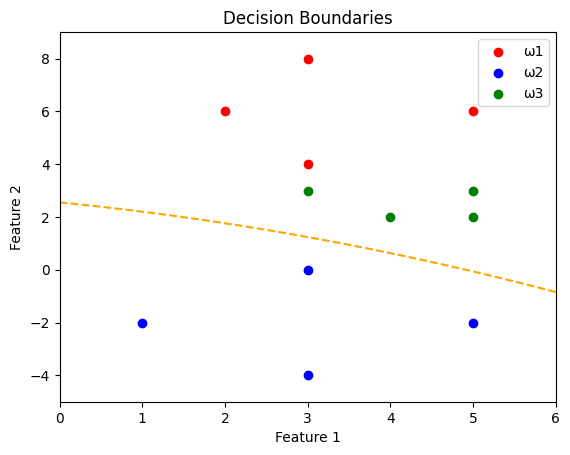

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points
omega1 = np.array([[2, 6], [3, 4], [3, 8], [5, 6]])
omega2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])
omega3 = np.array([[3, 3], [4, 2], [5, 2], [5, 3]])

# Step 1: Compute mean vectors and covariance matrices for all classes
mean_omega1 = np.mean(omega1, axis=0)
mean_omega2 = np.mean(omega2, axis=0)
mean_omega3 = np.mean(omega3, axis=0)

cov_omega1 = np.cov(omega1, rowvar=False, bias=False)
cov_omega2 = np.cov(omega2, rowvar=False, bias=False)
cov_omega3 = np.cov(omega3, rowvar=False, bias=False)

# Step 2: Calculate decision boundary parameters
inv_cov_omega1 = np.linalg.inv(cov_omega1)
inv_cov_omega2 = np.linalg.inv(cov_omega2)
inv_cov_omega3 = np.linalg.inv(cov_omega3)

# Coefficients for quadratic decision boundary: a*x^2 + b*y^2 + c*x*y + d*x + e*y + f = 0
a_omega1 = 0.5 * (inv_cov_omega2[0, 0] - inv_cov_omega3[0, 0])
b_omega1 = 0.5 * (inv_cov_omega2[1, 1] - inv_cov_omega3[1, 1])
c_omega1 = inv_cov_omega2[0, 1] - inv_cov_omega3[0, 1]
d_omega1 = mean_omega2[0] * inv_cov_omega2[0, 0] - mean_omega3[0] * inv_cov_omega3[0, 0]
e_omega1 = mean_omega2[1] * inv_cov_omega2[1, 1] - mean_omega3[1] * inv_cov_omega3[1, 1]
f_omega1 = 0.5 * (np.dot(mean_omega3, np.dot(inv_cov_omega3, mean_omega3)) - np.dot(mean_omega2, np.dot(inv_cov_omega2, mean_omega2)))

a_omega2 = 0.5 * (inv_cov_omega3[0, 0] - inv_cov_omega1[0, 0])
b_omega2 = 0.5 * (inv_cov_omega3[1, 1] - inv_cov_omega1[1, 1])
c_omega2 = inv_cov_omega3[0, 1] - inv_cov_omega1[0, 1]
d_omega2 = mean_omega3[0] * inv_cov_omega3[0, 0] - mean_omega1[0] * inv_cov_omega1[0, 0]
e_omega2 = mean_omega3[1] * inv_cov_omega3[1, 1] - mean_omega1[1] * inv_cov_omega1[1, 1]
f_omega2 = 0.5 * (np.dot(mean_omega1, np.dot(inv_cov_omega1, mean_omega1)) - np.dot(mean_omega3, np.dot(inv_cov_omega3, mean_omega3)))

a_omega3 = 0.5 * (inv_cov_omega1[0, 0] - inv_cov_omega2[0, 0])
b_omega3 = 0.5 * (inv_cov_omega1[1, 1] - inv_cov_omega2[1, 1])
c_omega3 = inv_cov_omega1[0, 1] - inv_cov_omega2[0, 1]
d_omega3 = mean_omega1[0] * inv_cov_omega1[0, 0] - mean_omega2[0] * inv_cov_omega2[0, 0]
e_omega3 = mean_omega1[1] * inv_cov_omega1[1, 1] - mean_omega2[1] * inv_cov_omega2[1, 1]
f_omega3 = 0.5 * (np.dot(mean_omega2, np.dot(inv_cov_omega2, mean_omega2)) - np.dot(mean_omega1, np.dot(inv_cov_omega1, mean_omega1)))

# Step 3: Generate mesh grid
x_min, x_max = min(omega1[:, 0].min(), omega2[:, 0].min(), omega3[:, 0].min()) - 1, max(omega1[:, 0].max(), omega2[:, 0].max(), omega3[:, 0].max()) + 1
y_min, y_max = min(omega1[:, 1].min(), omega2[:, 1].min(), omega3[:, 1].min()) - 1, max(omega1[:, 1].max(), omega2[:, 1].max(), omega3[:, 1].max()) + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
# Step 4: Plot data points and decision boundaries
plt.scatter(omega1[:, 0], omega1[:, 1], color='red', label='ω1')
plt.scatter(omega2[:, 0], omega2[:, 1], color='blue', label='ω2')
plt.scatter(omega3[:, 0], omega3[:, 1], color='green', label='ω3')

# Compute decision boundaries
zz_omega1 = a_omega1*xx**2 + b_omega1*yy**2 + c_omega1*xx*yy + d_omega1*xx + e_omega1*yy + f_omega1
zz_omega2 = a_omega2*xx**2 + b_omega2*yy**2 + c_omega2*xx*yy + d_omega2*xx + e_omega2*yy + f_omega2
zz_omega3 = a_omega3*xx**2 + b_omega3*yy**2 + c_omega3*xx*yy + d_omega3*xx + e_omega3*yy + f_omega3

# Plot decision boundaries
#plt.contour(xx, yy, zz_omega1, levels=[0], colors='black', linestyles='dashed')
#plt.contour(xx, yy, zz_omega2, levels=[0], colors='purple', linestyles='dashed')
plt.contour(xx, yy, zz_omega3, levels=[0], colors='orange', linestyles='dashed')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundaries')
plt.show()


Mean of omega1:  [3.25 6.  ]
Mean of omega2:  [ 3. -2.]
Mean of omega3:  [9.5  9.75]
Covariance of omega1:  [[1.58333333 0.        ]
 [0.         2.66666667]]
Covariance of omega2:  [[2.66666667 0.        ]
 [0.         2.66666667]]
Covariance of omega3:  [[1.66666667 0.16666667]
 [0.16666667 2.91666667]]


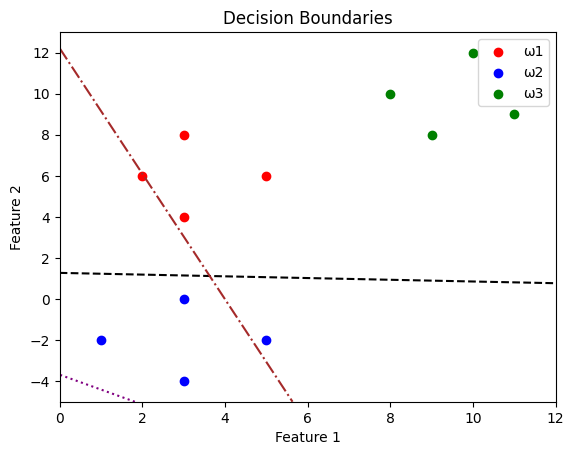

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data points for each class
omega1 = np.array([[2, 6], [3, 4], [3, 8], [5, 6]])
omega2 = np.array([[3, 0], [1, -2], [3, -4], [5, -2]])
omega3 = np.array([[8, 10], [9, 8], [10, 12], [11, 9]])

# Step 1: Compute mean vectors and covariance matrices for all classes
mean_omega1 = np.mean(omega1, axis=0)
mean_omega2 = np.mean(omega2, axis=0)
mean_omega3 = np.mean(omega3, axis=0)

cov_omega1 = np.cov(omega1, rowvar=False, bias=False)
cov_omega2 = np.cov(omega2, rowvar=False, bias=False)
cov_omega3 = np.cov(omega3, rowvar=False, bias=False)

print('Mean of omega1: ', mean_omega1)  
print('Mean of omega2: ', mean_omega2)
print('Mean of omega3: ', mean_omega3)
print('Covariance of omega1: ', cov_omega1)
print('Covariance of omega2: ', cov_omega2)
print('Covariance of omega3: ', cov_omega3)

# Step 2: Calculate decision boundary parameters
inv_cov_omega1 = np.linalg.inv(cov_omega1)
inv_cov_omega2 = np.linalg.inv(cov_omega2)
inv_cov_omega3 = np.linalg.inv(cov_omega3)

w12 = np.dot((mean_omega1 - mean_omega2), (inv_cov_omega1 + inv_cov_omega2))
w23 = np.dot((mean_omega2 - mean_omega3), (inv_cov_omega2 + inv_cov_omega3))
w31 = np.dot((mean_omega3 - mean_omega1), (inv_cov_omega3 + inv_cov_omega1))

w10 = -0.5 * (np.dot(np.dot(mean_omega1, inv_cov_omega1), mean_omega1) - np.dot(np.dot(mean_omega2, inv_cov_omega2), mean_omega2))
w20 = -0.5 * (np.dot(np.dot(mean_omega3, inv_cov_omega3), mean_omega3) - np.dot(np.dot(mean_omega1, inv_cov_omega1), mean_omega1))
w30 = -0.5 * (np.dot(np.dot(mean_omega3, inv_cov_omega3), mean_omega3) - np.dot(np.dot(mean_omega1, inv_cov_omega1), mean_omega1))

# Step 3: Generate mesh grid
x_min, x_max = min(omega1[:, 0].min(), omega2[:, 0].min(), omega3[:, 0].min()) - 1, max(omega1[:, 0].max(), omega2[:, 0].max(), omega3[:, 0].max()) + 1
y_min, y_max = min(omega1[:, 1].min(), omega2[:, 1].min(), omega3[:, 1].min()) - 1, max(omega1[:, 1].max(), omega2[:, 1].max(), omega3[:, 1].max()) + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Step 4: Plot data points and decision boundaries
plt.scatter(omega1[:, 0], omega1[:, 1], color='red', label='ω1')
plt.scatter(omega2[:, 0], omega2[:, 1], color='blue', label='ω2')
plt.scatter(omega3[:, 0], omega3[:, 1], color='green', label='ω3')

# Compute decision boundaries
zz12 = w12[0]*xx + w12[1]*yy + w10
zz23 = w23[0]*xx + w23[1]*yy + w20
zz31 = w31[0]*xx + w31[1]*yy + w30

plt.contour(xx, yy, zz12, levels=[0], colors='black', linestyles='dashed')
plt.contour(xx, yy, zz23, levels=[0], colors='purple', linestyles='dotted')
plt.contour(xx, yy, zz31, levels=[0], colors='brown', linestyles='dashdot')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundaries')
plt.show()
